## Group: Jaswanth Kranthi Boppana, Manav Mandal, Sayan Das, Vishnuvardhan Reddy Kollu

In this assignment, we work with the Rock dataset that was first used in Nosofsky et al., (2017). The following are the files/folders from the OSF dataset that were used in solving the questions of the assignment.

* 360 Rocks
This file contains 360 rock images of category Igneous (I), Metamorphic (M), and Sedimentary (S). The first letter of the filename demarcates the category.

* 120 Rocks
This file contains 120 rock images of category Igneous (I), Metamorphic (M), and Sedimentary (S). The first letter of the filename demarcates the category.

* mds_360.txt
File mds_360.txt contains 8 features for each of the images (rankings are in the same order as the images in  '360 Rocks' folder).

* mds_120.txt
File mds_120.txt contains 8 features for each of the images (rankings are in the same order as the images in  '1200 Rocks' folder).


To simplify the running of the code, we mount our specific google drives with the above folder and files in them. Please ensure your google drive has the required folders before running the code.


# Q1 Run PCA on image dataset and find how many components are requred for 95% variance

In [ ]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import required packages
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding,  MDS
from scipy.spatial import procrustes
from scipy.stats import pearsonr
from sklearn.cluster import KMeans

In [ ]:
# add folder path
image_folder_path = '/content/drive/MyDrive/360 Rocks'

In [ ]:
# Function bringing image to executable format

def load_and_preprocess_images(folder_path):
    image_data = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read images in grayscale
            img = cv2.resize(img, (100, 100))          # Resize the images if needed
            img = img.flatten()                        # Flatten the image to a 1D array
            label = filename[0]

            image_data.append(img)
            labels.append(label)

    return np.array(image_data), np.array(labels)

In [ ]:
image_data, image_labels = load_and_preprocess_images(image_folder_path)

In [ ]:
# visualize the data as dataframe

df = pd.DataFrame(image_data)
df['label'] = image_labels
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,I
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,I
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,I
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,I
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,I


In [ ]:
# Scale image_data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
image_data_scaled = scaler.fit_transform(image_data)

In [ ]:
# running PCA for all possible components
pca = PCA()
pca.fit(image_data_scaled)

PCA()

In [ ]:
# extract variances for each component
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)


In [ ]:
# Calculate how many components required to preserve 95% variance
n_components_95_percent_variance = np.argmax(explained_variance_ratio_cumulative >= 0.95) + 1

In [ ]:
print("Number of components to preserve 95% of the variance:", n_components_95_percent_variance)

Number of components to preserve 95% of the variance: 214


Thus, according to the PCA analysis, we need 214 components to preserve 95% variance of the original image data

# Q2 Plot 10 images of your choice in the original form (without PCA) and then plot their reconstruction (projection in the original space) after you kept 95% of variance using PCA

In [ ]:
reduced_data = pca.transform(image_data)

In [ ]:
reconstructed_data = pca.inverse_transform(reduced_data)

In [ ]:
indices_to_plot = np.random.choice(len(image_data), 10, replace=False)

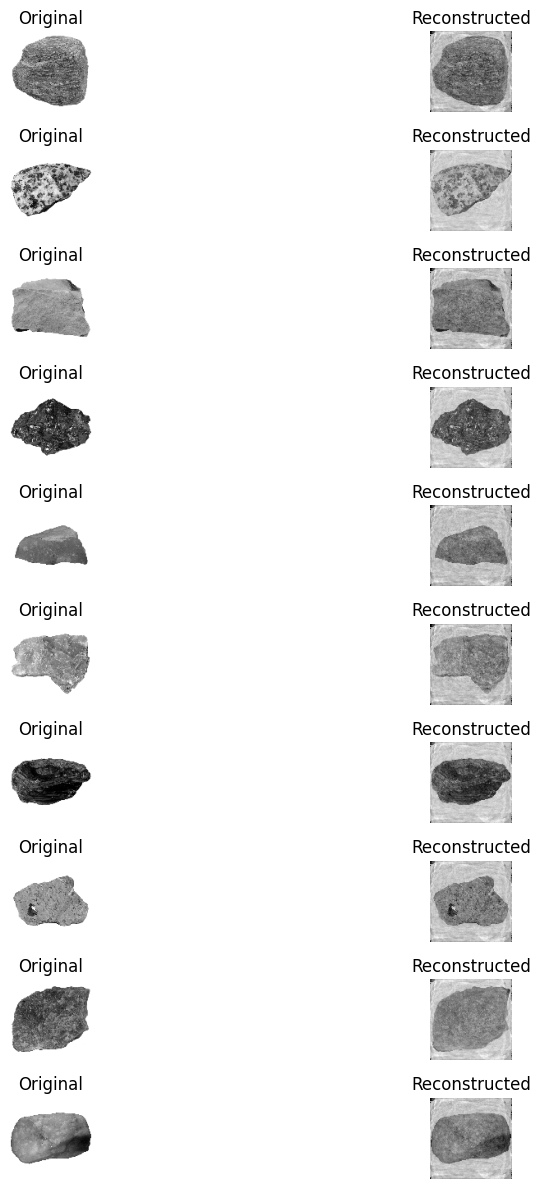

In [ ]:
plt.figure(figsize=(12, 12))  # Increase the figure size for better visualization
for i, index in enumerate(indices_to_plot):
    plt.subplot(10, 2, 2 * i + 1)
    plt.imshow(image_data[index].reshape(100, 100), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(10, 2, 2 * i + 2)
    plt.imshow(reconstructed_data[index].reshape(100, 100), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Q3 Visualize according to 3 categories and annotate with rock images

Do it for 2 component analysis: PCA, t-SNE, LLE, and MDS

In [ ]:
pca2 = PCA(n_components=2)
pc = pca2.fit_transform(image_data_scaled)

In [ ]:
explained_variance_ratio = pca2.explained_variance_ratio_
explained_variance = explained_variance_ratio.sum()

print("Explained variance with 2 components:",explained_variance * 100)


Explained variance with 2 components: 31.6013821232758


Therefore, the first 2 components preserve 31.6% variance of the original data.

In [ ]:
reduced_data = pca2.transform(image_data)

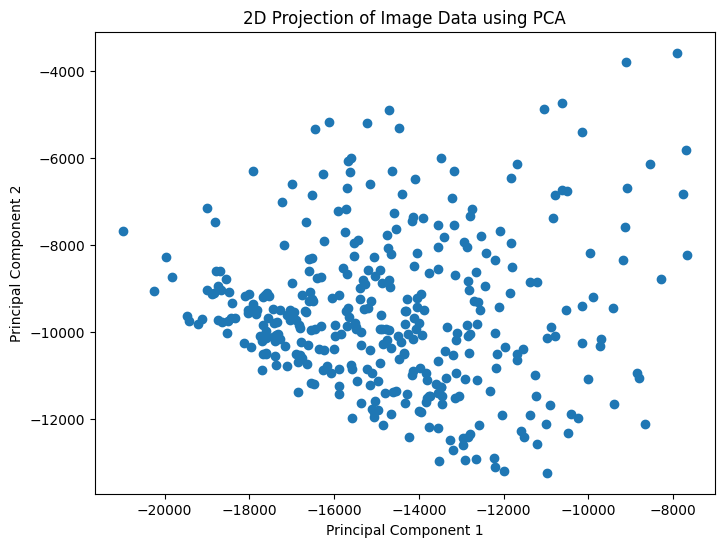

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of Image Data using PCA')
plt.show()

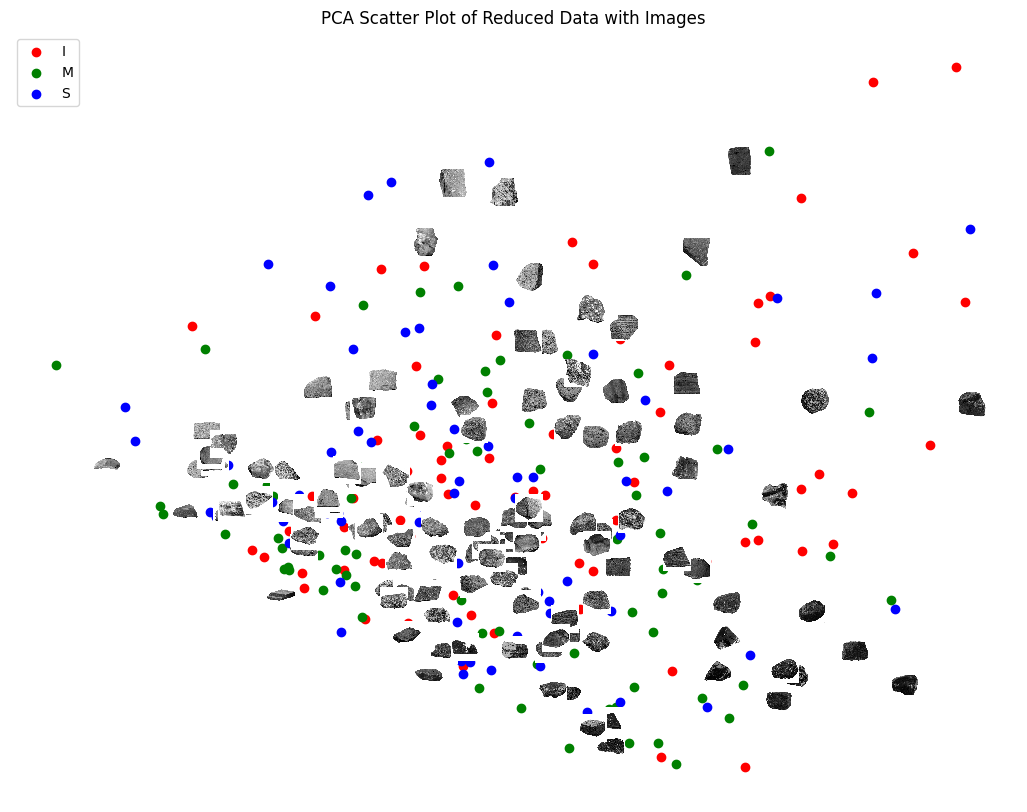

In [ ]:
# Scatter plotting PCA 2 component reconstructed data with annotation
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from PIL import Image

#neighbors = np.array([[10., 10.]])
#min_distance=0.04

label_type = np.unique(image_labels)

label_colors = {'I': 'red', 'M': 'green', 'S': 'blue'}

plt.figure(figsize=(13, 10))

for lab in label_type:
    indices = np.where(image_labels == lab)
    plt.scatter(
        reduced_data[indices, 0],
        reduced_data[indices, 1],
        label=lab,
        color=label_colors[lab],
    )
    plt.axis("off")
    for i in indices[0]:
      if i % 3 == 0 :
                      image_path = os.path.join(image_folder_path, os.listdir(image_folder_path)[i])
                      img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read images in grayscale
                      img = cv2.resize(img, (28, 28))  # Resize the images if needed
                      #img = Image.open(image_path).convert("L")
                      imagebox = OffsetImage(img, zoom=0.7,cmap='gray')#zoom=0.1
                      xy = reduced_data[i]
                      ab = AnnotationBbox(imagebox, xy, xycoords='data', boxcoords="data", frameon=False, arrowprops=dict(arrowstyle="->"))
                      plt.gca().add_artist(ab)

plt.title('PCA Scatter Plot of Reduced Data with Images')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
plt.legend()
plt.show()






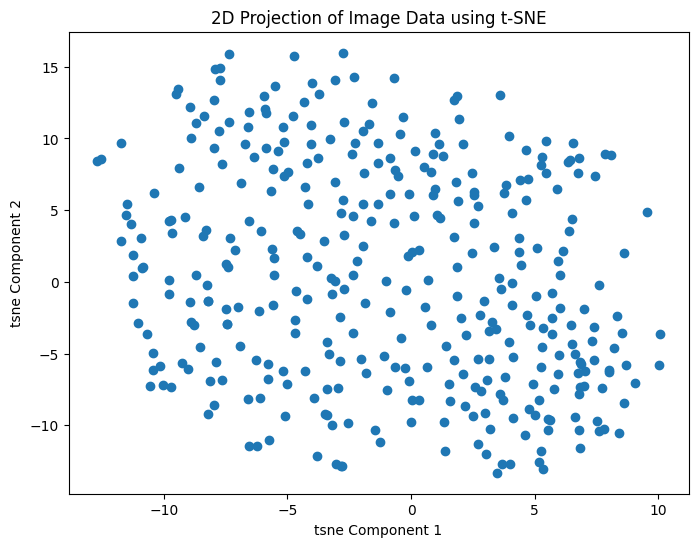

In [ ]:
# Repeat with t-SNE
from sklearn.manifold import TSNE

tsne2comp = TSNE(n_components=2, random_state=42)
#tsne2comp.fit(image_data)
reduced_data_tsne2comp = tsne2comp.fit_transform(image_data)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_tsne2comp[:, 0], reduced_data_tsne2comp[:, 1])
plt.xlabel('tsne Component 1')
plt.ylabel('tsne Component 2')
plt.title('2D Projection of Image Data using t-SNE')
plt.show()

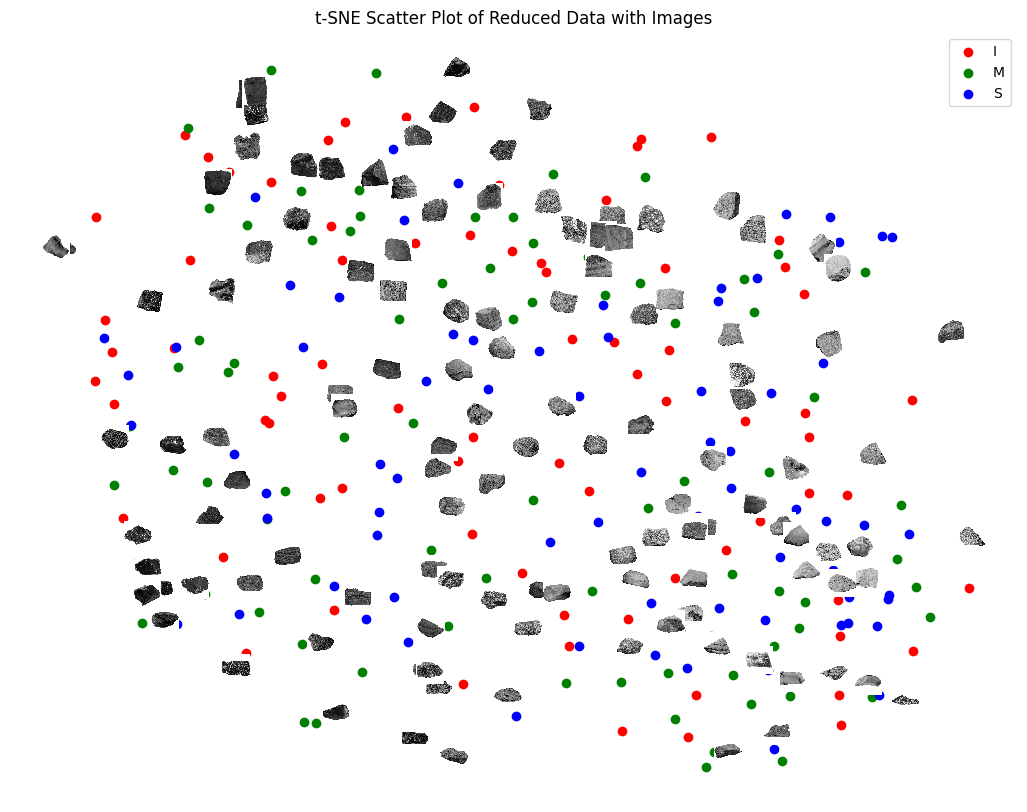

In [ ]:
# Plot
plt.figure(figsize=(13, 10))

for lab in label_type:
    indices = np.where(image_labels == lab)
    plt.scatter(
        reduced_data_tsne2comp[indices, 0],
        reduced_data_tsne2comp[indices, 1],
        label=lab,
        color=label_colors[lab],
    )
    plt.axis("off")
    for i in indices[0]:
      if i % 3 == 0 :
                      image_path = os.path.join(image_folder_path, os.listdir(image_folder_path)[i])
                      img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read images in grayscale
                      img = cv2.resize(img, (28, 28))  # Resize the images if needed
                      #img = Image.open(image_path).convert("L")
                      imagebox = OffsetImage(img, zoom=0.7,cmap='gray')#zoom=0.1
                      xy = reduced_data_tsne2comp[i]
                      ab = AnnotationBbox(imagebox, xy, xycoords='data', boxcoords="data", frameon=False, arrowprops=dict(arrowstyle="->"))
                      plt.gca().add_artist(ab)

plt.title('t-SNE Scatter Plot of Reduced Data with Images')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

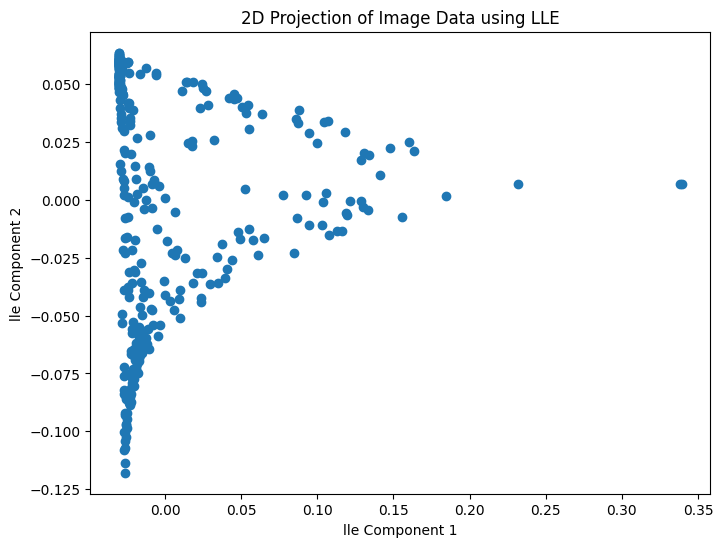

In [ ]:
# Repeat with LLE
from sklearn.manifold import LocallyLinearEmbedding

lle2comp = LocallyLinearEmbedding(n_components=2, random_state=42)
#tsne2comp.fit(image_data)
reduced_data_lle2comp = lle2comp.fit_transform(image_data)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_lle2comp[:, 0], reduced_data_lle2comp[:, 1])
plt.xlabel('lle Component 1')
plt.ylabel('lle Component 2')
plt.title('2D Projection of Image Data using LLE')
plt.show()

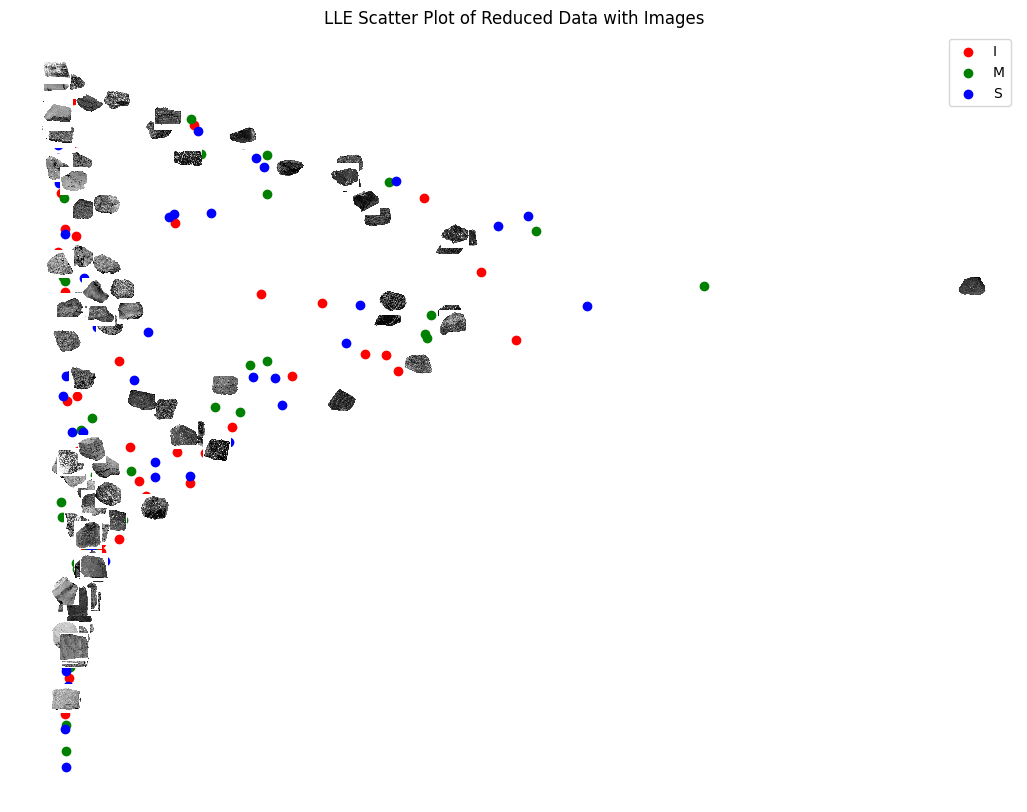

In [ ]:
# Plot
plt.figure(figsize=(13, 10))

for lab in label_type:
    indices = np.where(image_labels == lab)
    plt.scatter(
        reduced_data_lle2comp[indices, 0],
        reduced_data_lle2comp[indices, 1],
        label=lab,
        color=label_colors[lab],
    )
    plt.axis("off")
    for i in indices[0]:
      if i % 3 == 0 :
                      image_path = os.path.join(image_folder_path, os.listdir(image_folder_path)[i])
                      img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read images in grayscale
                      img = cv2.resize(img, (28, 28))  # Resize the images if needed
                      #img = Image.open(image_path).convert("L")
                      imagebox = OffsetImage(img, zoom=0.7,cmap='gray')#zoom=0.1
                      xy = reduced_data_lle2comp[i]
                      ab = AnnotationBbox(imagebox, xy, xycoords='data', boxcoords="data", frameon=False, arrowprops=dict(arrowstyle="->"))
                      plt.gca().add_artist(ab)

plt.title('LLE Scatter Plot of Reduced Data with Images')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

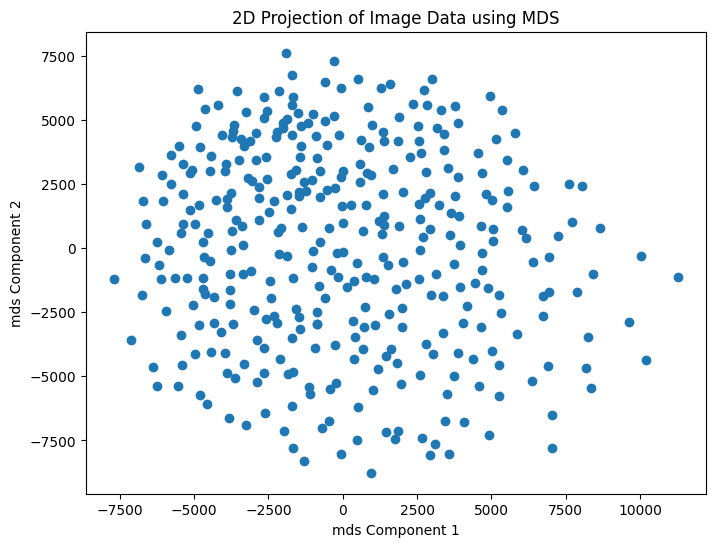

In [ ]:
# Repeat with MDS
from sklearn.manifold import MDS

mds2comp = MDS(n_components=2, random_state=42)
#tsne2comp.fit(image_data)
reduced_data_mds2comp = mds2comp.fit_transform(image_data)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_mds2comp[:, 0], reduced_data_mds2comp[:, 1])
plt.xlabel('mds Component 1')
plt.ylabel('mds Component 2')
plt.title('2D Projection of Image Data using MDS')
plt.show()

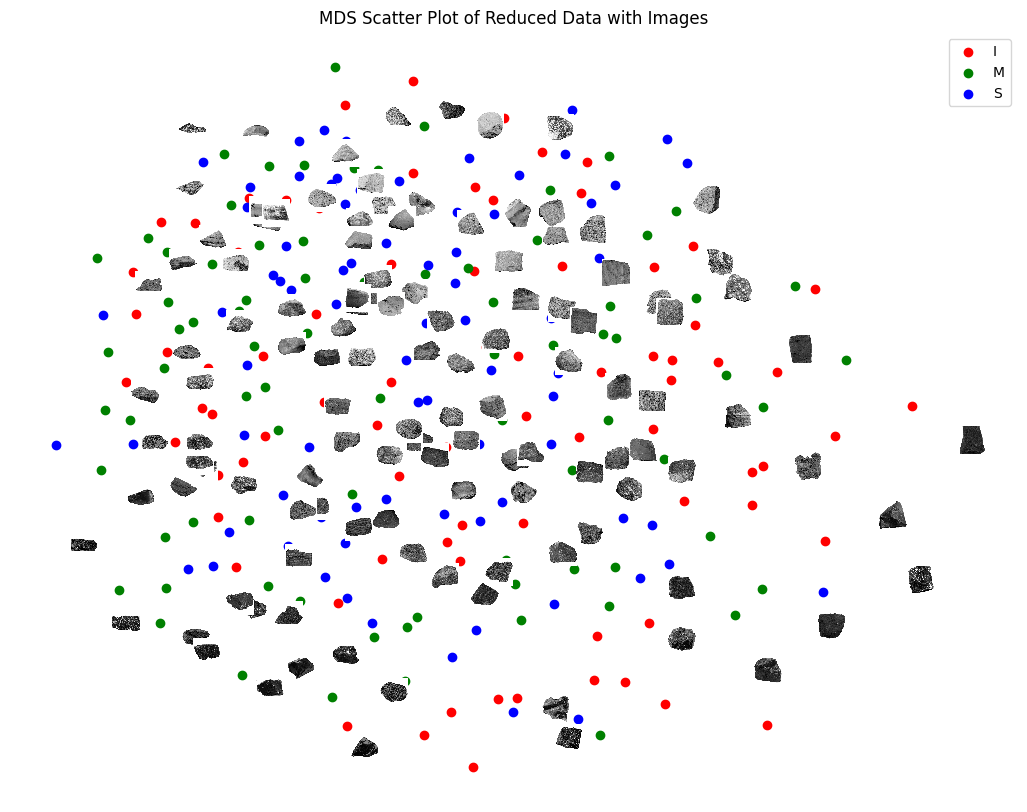

In [ ]:
# Plot
plt.figure(figsize=(13, 10))

for lab in label_type:
    indices = np.where(image_labels == lab)
    plt.scatter(
        reduced_data_mds2comp[indices, 0],
        reduced_data_mds2comp[indices, 1],
        label=lab,
        color=label_colors[lab],
    )
    plt.axis("off")
    for i in indices[0]:
      if i % 3 == 0 :
                      image_path = os.path.join(image_folder_path, os.listdir(image_folder_path)[i])
                      img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read images in grayscale
                      img = cv2.resize(img, (28, 28))  # Resize the images if needed
                      #img = Image.open(image_path).convert("L")
                      imagebox = OffsetImage(img, zoom=0.7,cmap='gray')#zoom=0.1
                      xy = reduced_data_mds2comp[i]
                      ab = AnnotationBbox(imagebox, xy, xycoords='data', boxcoords="data", frameon=False, arrowprops=dict(arrowstyle="->"))
                      plt.gca().add_artist(ab)

plt.title('MDS Scatter Plot of Reduced Data with Images')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Which one is better?

In our output, we observe that t-SNE shows the least overlap, and a clear gradation of rock colors which makes it easier to identify. Therefore, we prefer, t-SNE method for visualisation

# Q4 Understanding disparity between our results and human decisions, and dimensional correlation

To ensure 8 component analysis with t-SNE, 'exact' algorithm had to be used.

In [ ]:
features = np.loadtxt('/content/drive/MyDrive/mds_360.txt')

In [ ]:
# Running 8 component analysis for PCA, t-SNE, LLE and MDS
results = {}
corr = []

dimRed = {
    'PCA': PCA(n_components=8),
    't-SNE': TSNE(n_components=8, method='exact'),
    'LLE': LocallyLinearEmbedding(n_components=8),
    'MDS': MDS(n_components=8),
}

for name, method in dimRed.items():
  reducedImage = method.fit_transform(image_data_scaled)
  m1, m2, disparity = procrustes(features, reducedImage)
  corr = [pearsonr(m1[:, i], m2[:, i])[0] for i in range(8)]

  results[method] = {
        'Disparity': disparity,
        'Correlations': corr,
    }



In [ ]:
from prettytable import PrettyTable

disp_table = PrettyTable()
disp_table.field_names = ["Method", "Disparity", "Correlations"]

# Add rows to the table
for method_name, result in results.items():
    disparity_value = result['Disparity']
    correlations = result['Correlations']

    disp_table.add_row([method_name, f"{disparity_value:.4f}", correlations])

# Print the formatted table
print(disp_table)

+----------------------------------------+-----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                 Method                 | Disparity |                                                                               Correlations                                                                               |
+----------------------------------------+-----------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|          PCA(n_components=8)           |   0.9847  |  [0.11139068596066434, 0.10785943787348931, 0.13392222887872468, 0.13660653230159706, 0.0898475936118393, 0.12333203747058104, 0.1668779162798121, 0.13327259080158427]  |
|  TSNE(method='exact', n_components=8)  |   0.9846  | [0.12601265698009984, 0.08305303739851504

The table shows that there is high disparity and low correlation between the 8 component dimensionality reduction and human decisions

# Q5 Reduce dimensionality with PCA, then cluster 360 images with K-Means

In [ ]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(image_data_scaled)

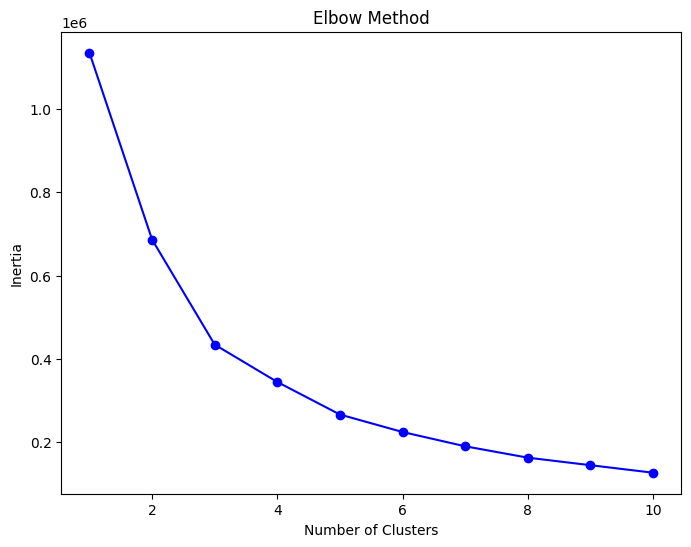

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
#X_10k=np.array(range(10000)).reshape(1, -1)# selecting 10k samples from reduced training set
#from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(reduced_data) for k in range(1, 10)]
silhouette_scores = [silhouette_score(reduced_data, model.labels_)
                     for model in kmeans_per_k[1:]]

Text(0, 0.5, 'Silhouette score')

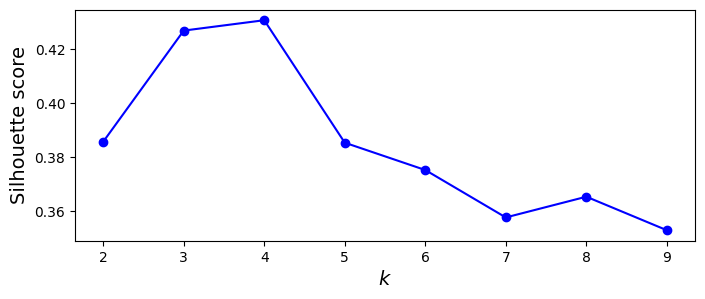

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10),silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

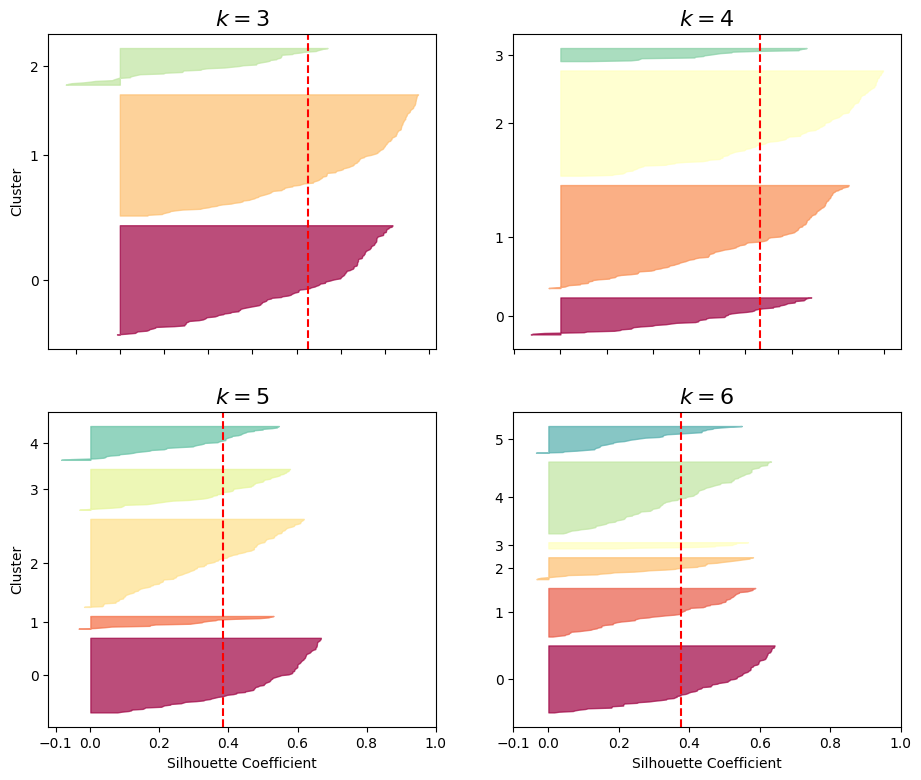

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))
for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(reduced_data, y_pred)
    padding = len(reduced_data) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

The elbow method, silhouette score plot and silhouette shape chart point towards 3 clusters being the optimal number.

In [ ]:
k_optimal = 3

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(reduced_data)

cluster_labels = kmeans.labels_

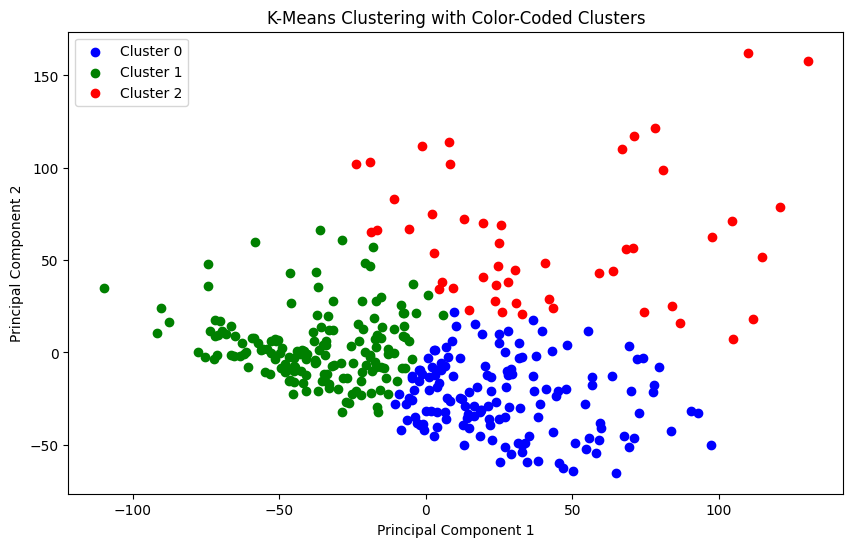

In [ ]:
kmeans_cluster_labels = kmeans.labels_
plt.figure(figsize=(10, 6))
cluster_colors = ['b', 'g', 'r']

for cluster_label in range(k_optimal):
    cluster_mask = kmeans_cluster_labels == cluster_label
    plt.scatter(reduced_data[cluster_mask, 0], reduced_data[cluster_mask, 1], c=cluster_colors[cluster_label], label=f'Cluster {cluster_label}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with Color-Coded Clusters')
plt.legend()
plt.show()


In [ ]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
def plot_data(X,Y):
    unique_labels = np.unique(Y)
    label_to_index = {label: i for i, label in enumerate(unique_labels)}
    colors = np.array([label_to_index[label] for label in Y])
    plt.scatter(X[:, 0], X[:, 1], marker='.', c=colors, cmap="jet")

    norm = Normalize(vmin=0, vmax=len(unique_labels) - 1)
    sm = ScalarMappable(cmap="jet", norm=norm)
    sm.set_array([])  # This line is necessary for ScalarMappable to work with scatter plot





    # Add legends based on unique labels
    legends = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=sm.to_rgba(i), markersize=10, label=label) for i, label in enumerate(unique_labels)]
    plt.legend(handles=legends, title='Labels', loc='upper right')

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, Y,resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X,Y)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

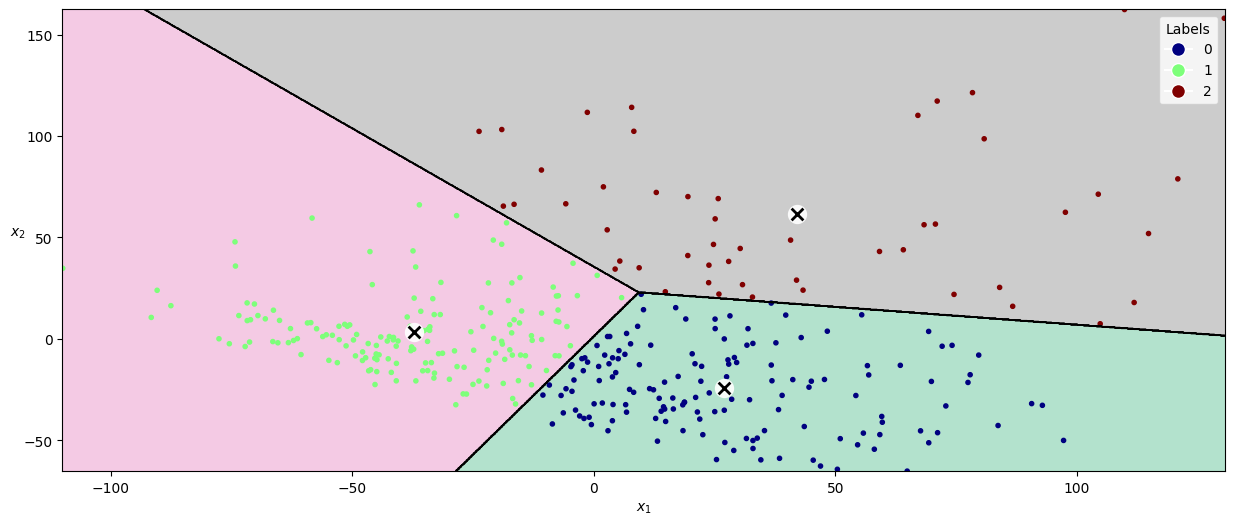

In [ ]:
plt.figure(figsize=(15, 6))
plot_decision_boundaries(kmeans, reduced_data ,kmeans_cluster_labels)
# plt.legend(title='Labels')
plt.show()

# Q6 Reduce dimensionality with PCA, then cluster 360 images with Gaussian Mixture EM

In this method, we find 3 to be the optimum number of components from the BIC curve. The boundaries and the scatter plots have been generated accordingly. We have reconstructed 20 images at the end

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GaussianMixture

gms_per_k = [GaussianMixture(n_components=k,n_init=10, random_state=42).
fit(reduced_data) for k in range(1,17)]

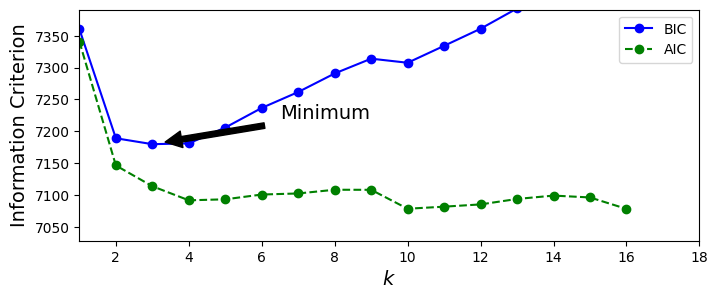

In [ ]:
bics= [model.bic(reduced_data) for model in gms_per_k]
aics= [model.aic(reduced_data) for model in gms_per_k]
plt.figure(figsize=(8,3))
plt.plot(range(1,17), bics,"bo-",label="BIC")
plt.plot(range(1, 17), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 18, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
xy=(3, bics[2]),
xytext=(0.35, 0.6),
textcoords='figure fraction',
fontsize=14,
arrowprops=dict(facecolor='black', shrink=0.1))
plt.legend()
plt.show()

In [ ]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
  if weights is not None:
    centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
    marker='o', s=35, linewidths=8,
    color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
    marker='x', s=2, linewidths=12,color=cross_color, zorder=11, alpha=1)

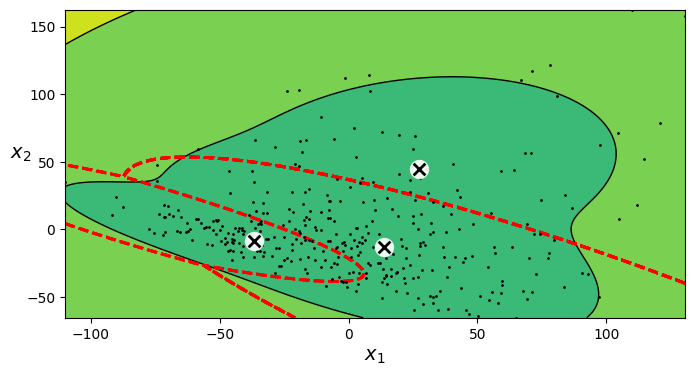

In [ ]:
from matplotlib.colors import LogNorm
import pandas as pd
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
  mins = X.min(axis=0) - 0.1
  maxs = X.max(axis=0) + 0.1
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
  np.linspace(mins[1], maxs[1], resolution))
  Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z,
  norm=LogNorm(vmin=1.0, vmax=30.0),
  levels=np.logspace(0, 2, 12))
  plt.contour(xx, yy, Z,
  norm=LogNorm(vmin=1.0, vmax=30.0),
  levels=np.logspace(0, 2, 12),
  linewidths=1, colors='k')
  Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contour(xx, yy, Z,
  linewidths=2, colors='r', linestyles='dashed')
  X=pd.DataFrame(X)
  plt.plot(X.iloc[:, 0], X.iloc[:, 1], 'k.', markersize=2)
  plot_centroids(clusterer.means_, clusterer.weights_)
  plt.xlabel("$x_1$", fontsize=14)
  if show_ylabels:
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
  else:
    plt.tick_params(labelleft=False)
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gms_per_k[2], reduced_data)
plt.show()

             0          1  cluster
0    22.546714 -47.216080        6
1    80.778722  98.612766       11
2    22.142929 -20.863631        0
3   -21.830861  27.578345       10
4    20.924564 -12.244613        0
..         ...        ...      ...
355   3.283097   1.173086        0
356   3.840786 -18.752411        0
357 -62.173899  -0.792973        2
358 -72.177821  -3.765765        2
359 -66.321696  14.132749        2

[360 rows x 3 columns]


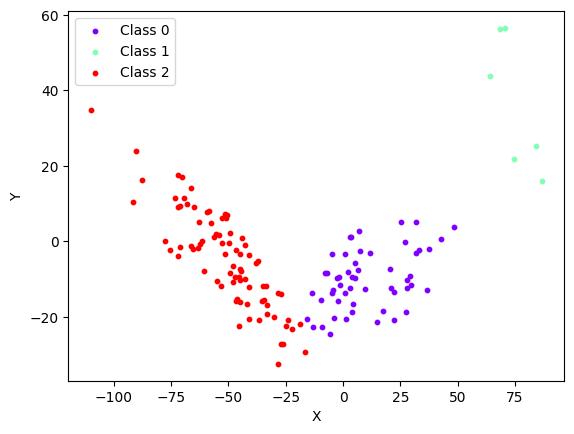

In [ ]:
ypred_gms=gms_per_k[11].predict(reduced_data)
x2_gm=pd.DataFrame(reduced_data)
x1_gm=pd.DataFrame(ypred_gms,columns=['cluster'])
X_10k_clus_gms=pd.concat([x2_gm,x1_gm],axis=1)
num_classes=3
colors = plt.cm.rainbow(np.linspace(0, 1, num_classes))
fig, ax = plt.subplots()
print(X_10k_clus_gms)
for i in range(num_classes):
  mask = x1_gm['cluster'] == i
  ax.scatter(X_10k_clus_gms.loc[mask,0],X_10k_clus_gms.loc[mask,1],s=10,c=colors[i], label=f'Class {i}')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()

In [ ]:
lowest_bic = np.infty
best_n_components = 3

In [ ]:
from sklearn.mixture import GaussianMixture as gm
gmm = GaussianMixture(n_components=best_n_components, random_state=42)
gmm.fit(reduced_data)
X_new, y_new = gmm.sample(20)
X_gm=pd.concat([pd.DataFrame(X_new),pd.DataFrame(X_new)])
X_gm_recovered=pca.inverse_transform(X_gm)

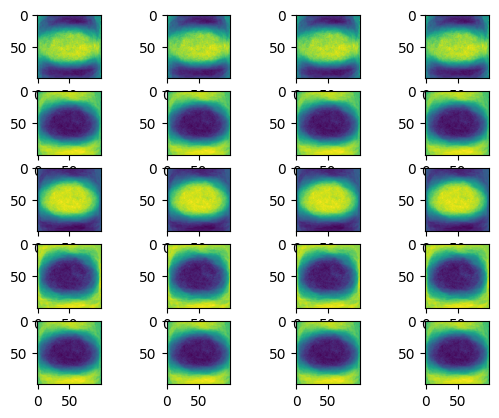

In [ ]:
f, axarr = plt.subplots(5,4)
idx=0
for i in range(5):
  for j in range(4):
    axarr[i,j].imshow(X_gm_recovered[idx].reshape((100,100)))
  idx+=1

# Q7 Build neural network to train models on the Rocks 360 data

Keeping 8 neurons in the second last layer led to accuracy not climbing above 33%. We tried changing the number of layers, learning rate and number of neurons.

In [ ]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

In [ ]:
train_data_dir = '/content/drive/MyDrive/360 Rocks'
validation_data_dir = '/content/drive/MyDrive/120 Rocks'

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
img_width, img_height = 100, 100
epochs = 20
batch_size = 32

In [ ]:
def load_and_preprocess_images(folder_path):
    image_files = os.listdir(folder_path)
    images = []
    labels = []
    for file in image_files:
        img_path = os.path.join(folder_path, file)
        img = load_img(img_path, target_size=(img_width, img_height))
        img_array = img_to_array(img)
        img_array /= 255.0  # Normalize pixel values to between 0 and 1
        images.append(img_array)
        labels.append(file[0])  # Assuming the first letter indicates the class
    return np.array(images), np.array(labels)

In [ ]:
train_images, train_labels = load_and_preprocess_images(train_data_dir)

# Load and preprocess validation data
validation_images, validation_labels = load_and_preprocess_images(validation_data_dir)


In [ ]:
train_images.shape

(360, 100, 100, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Use LabelEncoder to convert class labels to integers
# Use LabelEncoder to convert class labels to integers
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
validation_labels_encoded = label_encoder.transform(validation_labels)

# Use OneHotEncoder to convert integer labels to one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False, categories='auto', drop=None)
train_labels = onehot_encoder.fit_transform(train_labels_encoded.reshape(-1, 1))
validation_labels = onehot_encoder.transform(validation_labels_encoded.reshape(-1, 1))

# Verify the shapes
print("Train Labels Shape:", train_labels.shape)
print("Validation Labels Shape:", validation_labels.shape)




Train Labels Shape: (360, 3)
Validation Labels Shape: (120, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# First neural network following the 8 neuron condition for second last layer

model = Sequential()
model.add(Flatten(input_shape=(img_width, img_height, 3)))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))  # Output layer with 3 neurons

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 256)               7680256   
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 64)                8

In [ ]:
# print total and bias parameters in the model
def get_parameters(model):
    bias = np.sum([np.prod(i.shape) for i in model.trainable_variables if 'bias' in i.name])
    print(f'Total parameters in the model: {model.count_params()}')
    print(f'Total bias parameters in the model: {bias}')

In [ ]:
get_parameters(model)

Total parameters in the model: 7723779
Total bias parameters in the model: 459


As state above, for this neural network:

Total parameters in the model: 7723779

Total bias parameters in the model: 459

In [ ]:
import time
start_time = time.time()
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
end_time=time.time()
print("Run Time :",(end_time-start_time))

Run Time : 0.018474578857421875


In [ ]:
import time
start_time = time.time()
history = model.fit(
    train_images, train_labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(validation_images, validation_labels))
end_time=time.time()
print("Run Time :",(end_time-start_time))

Epoch 1/20
12/12 [==============================] - 9s 38ms/step - loss: 1.4668 - accuracy: 0.3583 - val_loss: 10.6619 - val_accuracy: 0.3333
Epoch 2/20
12/12 [==============================] - 0s 13ms/step - loss: 1.0543 - accuracy: 0.5056 - val_loss: 6.8146 - val_accuracy: 0.3333
Epoch 3/20
12/12 [==============================] - 0s 13ms/step - loss: 0.8820 - accuracy: 0.5889 - val_loss: 3.1024 - val_accuracy: 0.3167
Epoch 4/20
12/12 [==============================] - 0s 13ms/step - loss: 0.8104 - accuracy: 0.6472 - val_loss: 2.4702 - val_accuracy: 0.3667
Epoch 5/20
12/12 [==============================] - 0s 13ms/step - loss: 0.7211 - accuracy: 0.7111 - val_loss: 3.3303 - val_accuracy: 0.3417
Epoch 6/20
12/12 [==============================] - 0s 12ms/step - loss: 0.6307 - accuracy: 0.7528 - val_loss: 3.6729 - val_accuracy: 0.3167
Epoch 7/20
12/12 [==============================] - 0s 13ms/step - loss: 0.5452 - accuracy: 0.7944 - val_loss: 4.1619 - val_accuracy: 0.3333
Epoch 8/20
1

Time taken is 12.82 seconds.

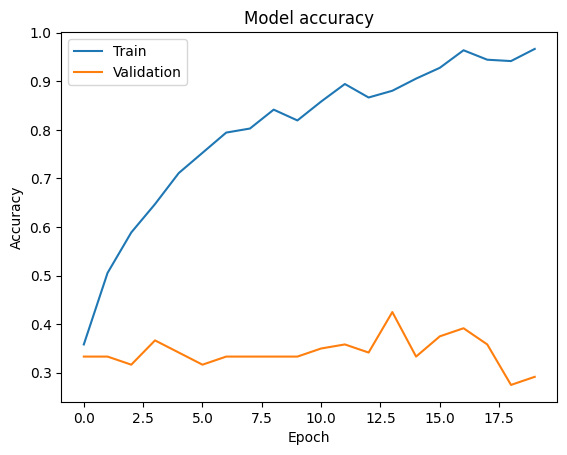

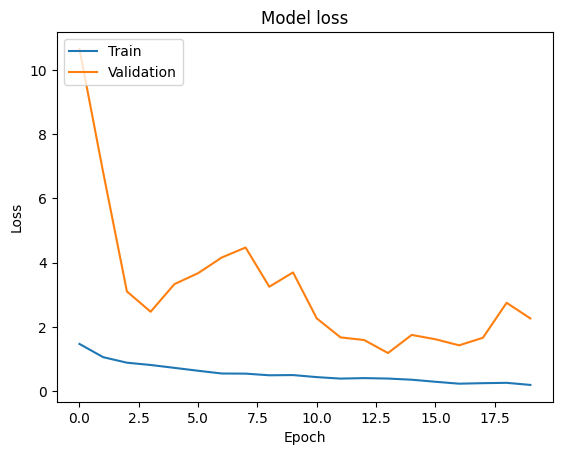

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable where you store the training history
# history = model.fit(...)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


The plots above show that the model is not working well.

In [ ]:
from tensorflow.keras.models import Model
layer_name = model.layers[-2].name #Gets the second last layer of the model
intermediate_layer = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
train = intermediate_layer.predict(train_images)
val = intermediate_layer.predict(validation_images)

4/4 [==============================] - 0s 4ms/step


In [ ]:
mds_360 = np.loadtxt('/content/drive/MyDrive/mds_360.txt')
mds_120 = np.loadtxt('/content/drive/MyDrive/mds_120.txt')

In [ ]:
mtx1_train, mtx2_train, train_disparity = procrustes(train, mds_360)
mtx1_val, mtx2_val, val_disparity = procrustes(val, mds_120)

In [ ]:
correlation_df = pd.DataFrame(columns=['Data', 'Disparity','Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4', 'Dimension 5', 'Dimension 6', 'Dimension 7', 'Dimension 8'])
def calculate_correlation(mtx1, mtx2, data,disparity):

    correlation = np.corrcoef(mtx1, mtx2)

    return data,disparity,correlation

data,disparity,dimensions = calculate_correlation(mds_360,train, "Training",disparity_df['Disparity'][0])
correlation_df.loc[len(correlation_df.index)] = [data,disparity,dimensions[0,0],dimensions[0,1],dimensions[0,2],dimensions[0,3],dimensions[0,4],dimensions[0,5],dimensions[0,6],dimensions[0,7]]

data,disparity,dimensions = calculate_correlation(mds_120,val, "Validation",disparity_df['Disparity'][1])
correlation_df.loc[len(correlation_df.index)] = [data,disparity,dimensions[1,0],dimensions[1,1],dimensions[1,2],dimensions[1,3],dimensions[1,4],dimensions[1,5],dimensions[1,6],dimensions[1,7]]


In [ ]:
# Display the correlation results
correlation_df.head()

,Data,Disparity,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6,Dimension 7,Dimension 8
0,Training,0.984658,1.000000,0.428542,-0.070319,0.026586,0.045631,0.260818,-0.224954,0.199132
1,Validation,0.981945,0.324682,1.000000,0.734468,0.938082,-0.566556,-0.270435,-0.580648,-0.601115
